In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [42]:
hist_lcoe = pd.read_csv('/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/elecsim/data/Power_Plants/Power_Plant_Costs/historical_costs/historical_plant_costs_adjusted.csv')
hist_lcoe = hist_lcoe.drop('Unnamed: 0', axis=1)
hist_lcoe

,Technology,Country,Year,Units,1981,1984,1989,1990,1991,1992,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,CCGT,UK,2013,USD/MWh - 5% discount rate,NaN,NaN,NaN,NaN,NaN,82.554880,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.690240,NaN,NaN
1,Coal,UK,2013,USD/MWh - 5% discount rate,177.19296,102.93248,80.015360,NaN,NaN,89.866240,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Nuclear,UK,2013,USD/MWh - 5% discount rate,123.83232,66.99008,75.243520,NaN,NaN,91.320320,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.821120,NaN,NaN
3,Onshore,UK,2016,USD/MWh,NaN,NaN,227.845116,231.916869,219.073838,203.865489,...,114.856837,109.575661,85.135243,82.575223,79.224732,80.673459,79.292780,75.543607,76.716725,NaN
4,PV - Utility,UK,2016,USD/MWh,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,440.876111,427.940633,489.408469,225.933202,194.421210,159.505145,158.338034,145.791593
5,Hydropower <10MW,Europe,2016,USD/MWh,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,103.826024,103.826024,103.826024,103.826024,103.826024,103.826024,103.826024,103.826024
6,Hydropower >10MW,Europe,2016,USD/MWh,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,135.229240,135.229240,135.229240,135.229240,135.229240,135.229240,135.229240,135.229240
7,Bioenergy,Europe,2016,USD/MWh,NaN,NaN,NaN,NaN,NaN,NaN,...,87.533311,87.533311,87.533311,87.533311,87.533311,87.533311,87.533311,87.533311,87.533311,NaN
8,Offshore,UK,Current,GBP/MWh,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,112.107095,110.072823,NaN,107.286021,108.833288,109.385076,110.691426,NaN,100.154410


In [43]:
offshore = hist_lcoe[hist_lcoe['Technology']=="Offshore"]
offshore.drop(['Units','Country'], axis=1)

,Technology,Year,1981,1984,1989,1990,1991,1992,1993,1994,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
8,Offshore,Current,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,112.107095,110.072823,NaN,107.286021,108.833288,109.385076,110.691426,NaN,100.15441


In [57]:
# pd.wide_to_long(offshore, ['1','2'],i='Technology', j='Year')
# print(offshore.loc['1981':'2017'].columns)

long_lcoe = pd.melt(hist_lcoe, id_vars=['Technology'], value_vars=['1981', '1984', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017'], value_name='lcoe', var_name="Year")
long_lcoe

,Technology,Year,lcoe
0,CCGT,1981,NaN
1,Coal,1981,177.192960
2,Nuclear,1981,123.832320
3,Onshore,1981,NaN
4,PV - Utility,1981,NaN
5,Hydropower <10MW,1981,NaN
6,Hydropower >10MW,1981,NaN
7,Bioenergy,1981,NaN
8,Offshore,1981,NaN
9,CCGT,1984,NaN


In [71]:
tech_groups = long_lcoe.groupby('Technology')
rowlength = math.ceil(tech_groups.ngroups/2)

5


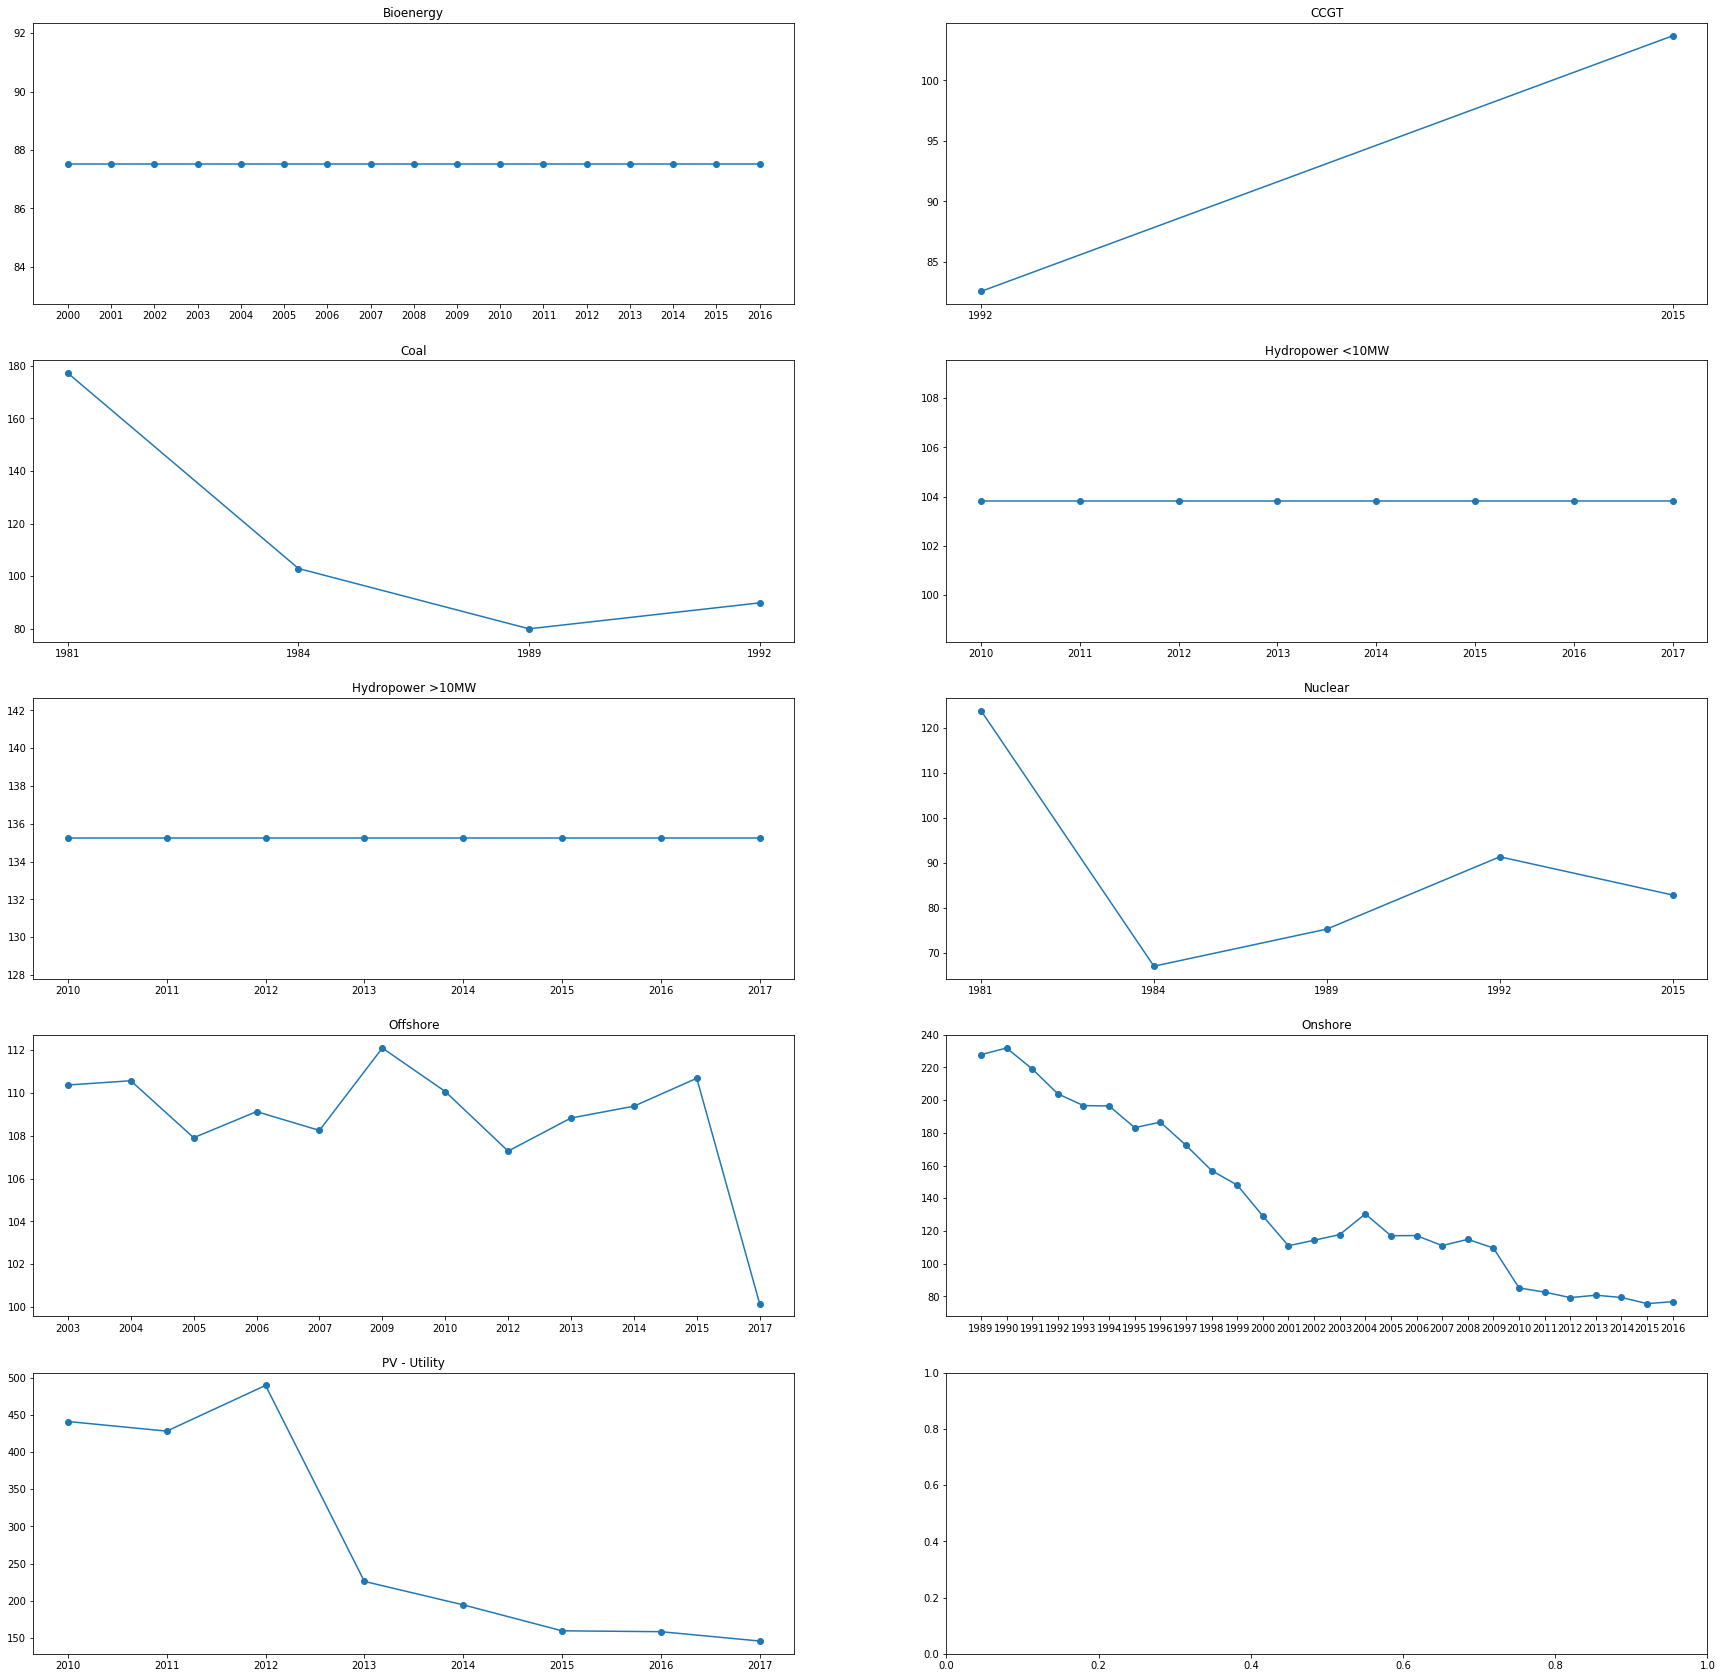

In [72]:
fig, axs = plt.subplots(nrows=rowlength, ncols=2, figsize=(30,30))

targets = zip(tech_groups.groups.keys(), axs.flatten())

for (key, ax) in targets:
    tech = tech_groups.get_group(key).sort_values("Year")
    tech = tech.dropna()
    ax.plot(tech['Year'], tech['lcoe'], marker='o')
    ax.set_title(key)
plt.show()

In [76]:
tech_groups.get_group("Coal")

,Year,lcoe
1,1981,177.19296
10,1984,102.93248
19,1989,80.01536
28,1990,NaN
37,1991,NaN
46,1992,89.86624
55,1993,NaN
64,1994,NaN
73,1995,NaN
82,1996,NaN
